In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Data Ingestion

In [2]:
data=sns.load_dataset('iris')

In [3]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

#### Univariate Analysis of Numerical Values

In [8]:
num=data.select_dtypes(exclude='object')

In [9]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [10]:
for column in num.columns:
    print(f'{column}:')
    print(f'mean:{ round(num[column].mean(),2)}')
    print(f'median:{ num[column].median()}')
    print(f'mode:{np.array(num[column].mode())[0]}')
    print(f'std:{round(num[column].std(),2)}')
    print(f'std:{num[column].count()}')
    print()

sepal_length:
mean:5.84
median:5.8
mode:5.0
std:0.83
std:149

sepal_width:
mean:3.06
median:3.0
mode:3.0
std:0.44
std:149

petal_length:
mean:3.75
median:4.3
mode:1.4
std:1.77
std:149

petal_width:
mean:1.19
median:1.3
mode:0.2
std:0.76
std:149



### Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data['species']=encode.fit_transform(data['species'])

In [12]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


<AxesSubplot:>

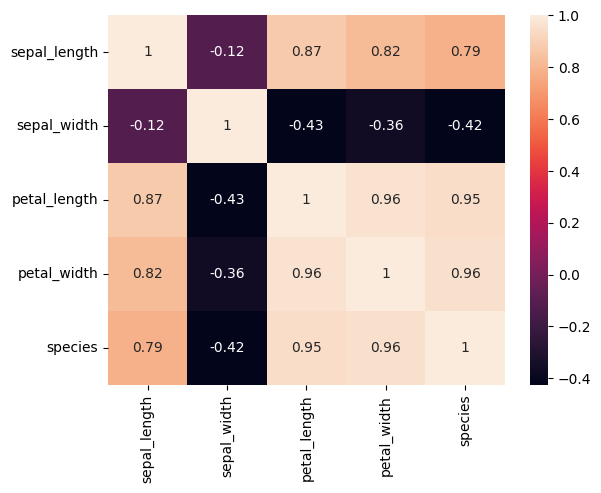

In [13]:
sns.heatmap(data.corr(),annot=True)

### Understanding the distributions

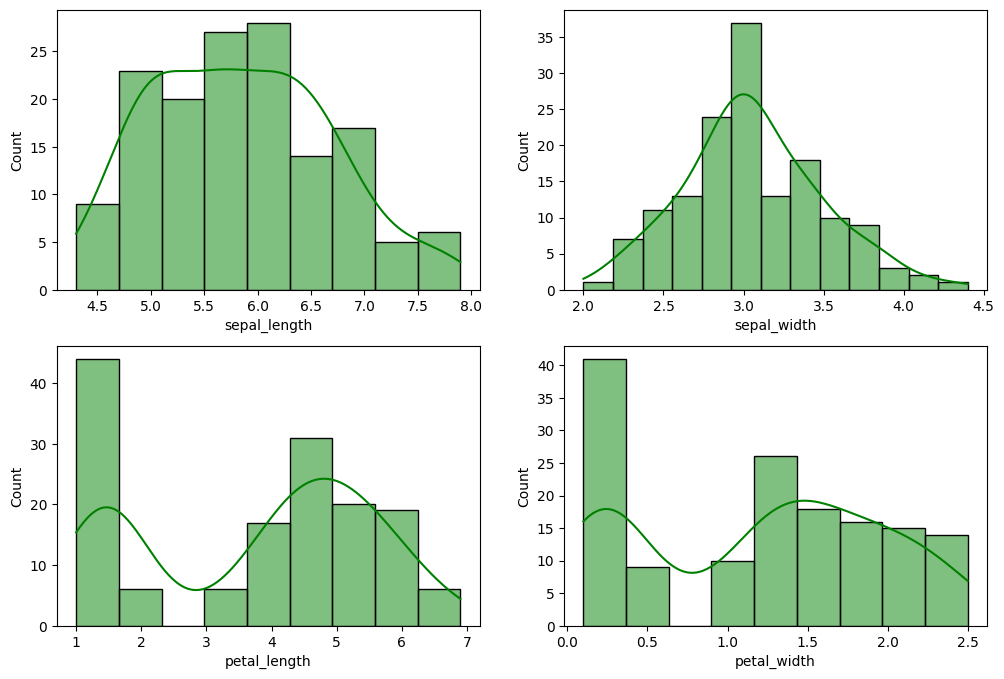

In [14]:
i=1
plt.figure(figsize=(12,8))
for column in data.columns[:4]:
    plt.subplot(2,2,i)
    i+=1
    sns.histplot(data[column],kde=True,color='green')